**Análisis de modelos**

**Preparación de datos**

Importamos los datos, preparamos el dataset y creamos los conjuntos de entrenamiento.

Creamos conjuntos de entrenamiento con diferentes algoritmos de oversampling

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from src.data_utils.data_utils import read_data, prepare_dummy_cols, normalize_num_vars
from src.model_utils.utils import boruta_selected_vars

excel_file_path = "D:\\develop\\predict_lapse\\data\\BBDD_Impago_1.0.xlsx"

df = read_data(excel_file_path)

cat_vars = ['Canal', 'Domiciliacion', 'Figuras', 'Motor', 'Pago', 'SegundoConductor', 'Tipo_Furgoneta', 'Tipo_Moto', 'Tipo_Turismo', 'Valor', 'Zonas_Zona1', 'Zonas_Zona2', 'Zonas_Zona3', 'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6', 'Zonas_Zona7', 'Zonas_Zona8']

feature_cols = ['Pago', 'Domiciliacion', 'Anyomatricula', 'Prima', 'Valor',
                'ValorVehículo', 'Motor', 'Canal', 'Socioec', 'Antigüedad', 'Carnet',
                'SegundoConductor', 'Figuras', 'Tipo_Furgoneta',
                'Tipo_Moto', 'Tipo_Turismo', 'Zonas_Zona1', 'Zonas_Zona2',
                'Zonas_Zona3', 'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6',
                'Zonas_Zona7', 'Zonas_Zona8']

df_dummy = prepare_dummy_cols(df, ['Tipo', 'Zonas'] )

num_vars = ['Anyomatricula', 'Prima', 'ValorVehículo', 'Socioec','Antigüedad', 'Carnet']

X = df_dummy[feature_cols]
y = df['Impago']

# Importante que la variable objetivo se distribuya en el conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = normalize_num_vars(X_train, num_vars)
X_test = normalize_num_vars(X_test, num_vars)




Aplicamos diferentes alogoritmos de oversampling y comprobamos cómo funcionan con el modelo de regresión logística.

In [2]:
from src.model_utils.oversampling import over_sm, over_adasyn, over_bsm, over_svmsm

X_train_sm, y_train_sm = over_sm(X_train, y_train)
X_train_adasyn, y_train_adasyn = over_adasyn(X_train, y_train)
X_train_bsm, y_train_bsm = over_bsm(X_train, y_train)
X_train_svmsm, y_train_svmsm = over_svmsm(X_train, y_train)



Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.006504       0.002496       0.046870  0.005310  0.987797   
PCA2 -0.114188       0.038556      -0.065093  0.585988  0.030075   

      ValorVehículo     Motor     Canal   Socioec  Antigüedad  ...  Tipo_Moto  \
PCA1      -0.043495 -0.017811 -0.057953  0.022938   -0.081937  ...   0.021479   
PCA2       0.696082  0.196795 -0.030692  0.053474   -0.081555  ...  -0.241164   

      Tipo_Turismo  Zonas_Zona1  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1     -0.006578    -0.023006     0.065187    -0.043599    -0.007907   
PCA2      0.197903    -0.006434    -0.006092    -0.007374     0.002176   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.013199    -0.000061    -0.001709    -0.004141  
PCA2     0.032197     0.001034    -0.000466     0.001677  

[2 rows x 24 columns]
Explained variance ratio for first two components:  [0.34033966 0.15434615]
Sum of explained variance ratio 

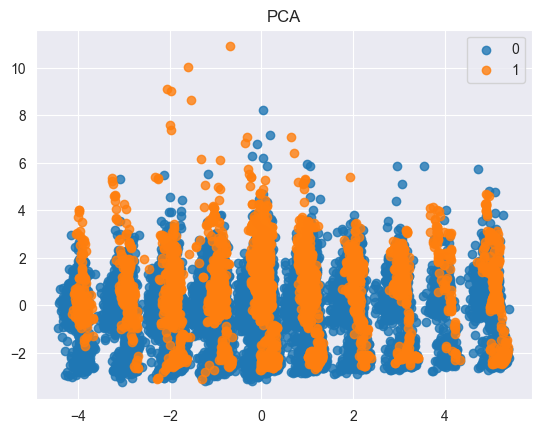

TSNE            TSNE1      TSNE2
0      61.695026  10.765033
1     -11.596731 -15.380313
2       6.432975  52.326275
3     -41.061577   3.781451
4      14.966326 -52.036701
...          ...        ...
27221 -81.568993   4.035370
27222  29.243469  -3.841983
27223  59.402699  16.039814
27224   4.016406 -83.063942
27225 -51.931267  33.851269

[27226 rows x 2 columns]


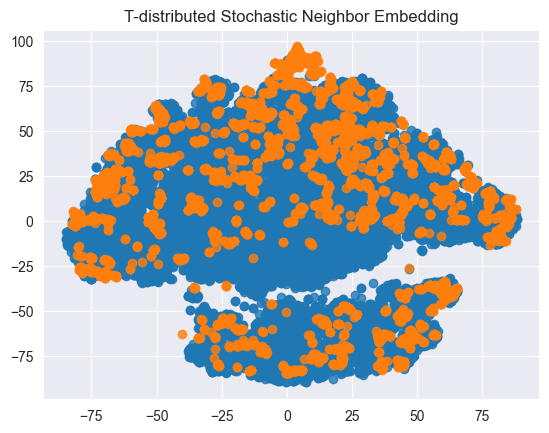

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.004997       0.001832       0.049722  0.002915  0.987086   
PCA2 -0.118960       0.040183      -0.062251  0.605345  0.031956   

      ValorVehículo     Motor     Canal   Socioec  Antigüedad  ...  Tipo_Moto  \
PCA1      -0.046062 -0.018531 -0.058640  0.024928   -0.083094  ...   0.022434   
PCA2       0.672699  0.198890 -0.026172  0.071411   -0.079931  ...  -0.246188   

      Tipo_Turismo  Zonas_Zona1  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1     -0.007504    -0.024270     0.066053    -0.043430    -0.007356   
PCA2      0.201375    -0.006063    -0.005927    -0.007924     0.001147   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.013310    -0.000263    -0.001454    -0.004059  
PCA2     0.031384     0.000969    -0.000303     0.001968  

[2 rows x 24 columns]
Explained variance ratio for first two components:  [0.34324722 0.15079229]
Sum of explained variance ratio 

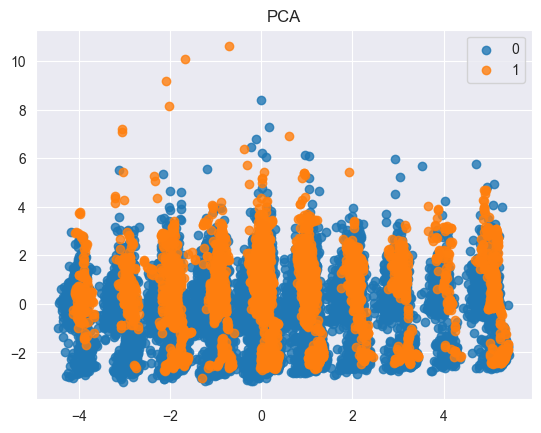

TSNE            TSNE1      TSNE2
0      61.586918  10.871491
1     -12.766341 -15.476259
2      12.242488  50.111023
3     -42.655540   6.629852
4      14.828369 -62.914410
...          ...        ...
27096  14.988624  65.185326
27097  14.962719  65.097633
27098  32.836124  40.258629
27099  32.835976  40.256386
27100  14.972116  65.123817

[27101 rows x 2 columns]


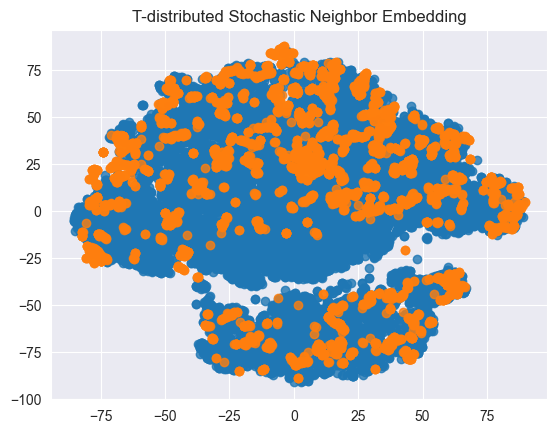

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.007459       0.000389       0.044171 -0.002152  0.985978   
PCA2 -0.122717       0.041825      -0.070500  0.595927  0.035812   

      ValorVehículo     Motor     Canal   Socioec  Antigüedad  ...  Tipo_Moto  \
PCA1      -0.049771 -0.019611 -0.062516  0.022379   -0.090705  ...   0.025088   
PCA2       0.678299  0.200913 -0.034870  0.072308   -0.100490  ...  -0.240989   

      Tipo_Turismo  Zonas_Zona1  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1     -0.009137    -0.027295     0.069669    -0.042443    -0.008199   
PCA2      0.200599    -0.006498    -0.003260    -0.007630     0.002121   

      Zonas_Zona5  Zonas_Zona6   Zonas_Zona7  Zonas_Zona8  
PCA1     0.012538      0.00059 -2.236967e-07    -0.004302  
PCA2     0.034097      0.00248 -3.699824e-04     0.001608  

[2 rows x 24 columns]
Explained variance ratio for first two components:  [0.34372102 0.15333801]
Sum of explained variance rat

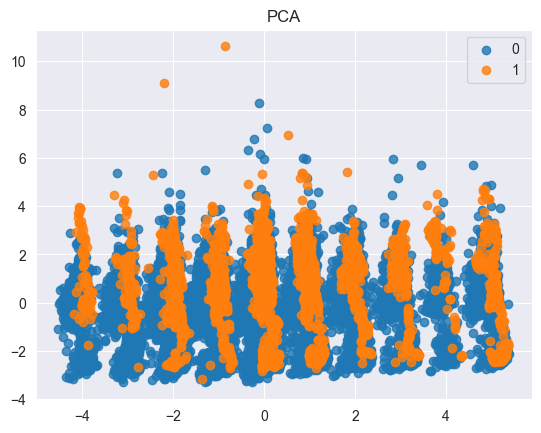

TSNE            TSNE1      TSNE2
0      55.348812   7.161002
1     -17.175840 -19.685921
2       4.018096  49.206833
3     -42.873589   3.549407
4      18.724108 -51.927082
...          ...        ...
27221 -66.417503  33.024967
27222  -4.426436  84.320992
27223  85.331299  -1.958277
27224 -45.301865  61.949444
27225 -52.447765  -7.619245

[27226 rows x 2 columns]


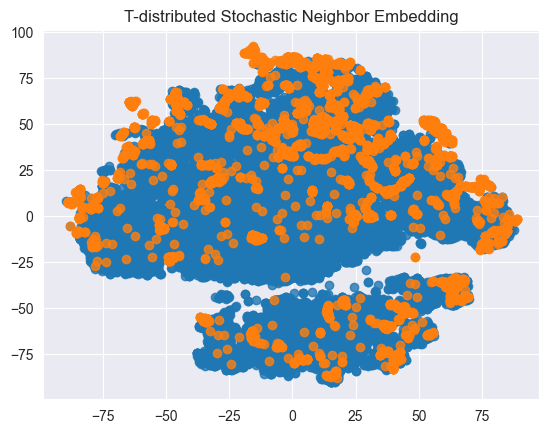

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.007354       0.001941       0.034104 -0.009419  0.987535   
PCA2 -0.060339       0.024288      -0.000977  0.419616  0.066896   

      ValorVehículo     Motor     Canal   Socioec  Antigüedad  ...  Tipo_Moto  \
PCA1      -0.074041 -0.017542 -0.058894  0.015050   -0.076864  ...   0.022670   
PCA2       0.851771  0.152371 -0.046748 -0.001313   -0.095652  ...  -0.165348   

      Tipo_Turismo  Zonas_Zona1  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1     -0.007793    -0.019188     0.060354    -0.040839    -0.012766   
PCA2      0.148840     0.001345     0.002109    -0.002504     0.008557   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.010655     0.000355    -0.002117    -0.003236  
PCA2     0.035092     0.000198     0.001913    -0.000819  

[2 rows x 24 columns]
Explained variance ratio for first two components:  [0.30801735 0.20749327]
Sum of explained variance ratio 

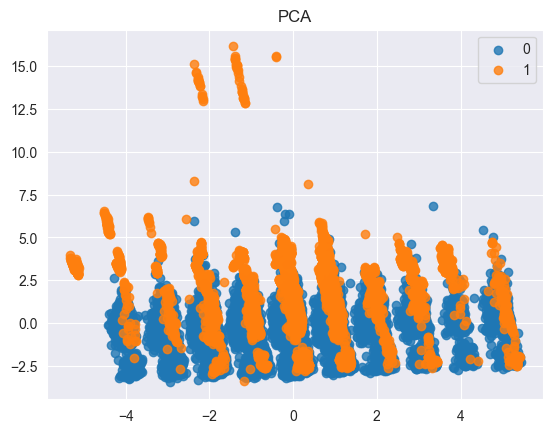

TSNE            TSNE1      TSNE2
0      54.754570   7.146162
1     -13.994489 -19.979750
2      -7.726508  40.206619
3     -40.217068  -2.540151
4      29.609854 -59.369381
...          ...        ...
27221 -61.848488  71.859756
27222 -15.013257  88.428818
27223 -34.579269  80.602898
27224 -12.798820  82.682137
27225 -67.149689  69.300659

[27226 rows x 2 columns]


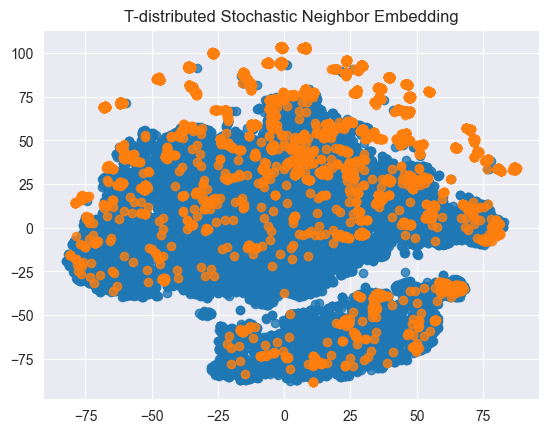

In [3]:
from src.model_utils.dim_reduction import tsne_2d, pca_2d
from src.model_utils.oversampling import over_sm, over_adasyn, over_bsm, over_svmsm
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, max_iter=2000)

X_train_sm, y_train_sm = over_sm(X_train, y_train)
pca_2d(X_train_sm, y_train_sm)
tsne_2d(X_train_sm, y_train_sm)

X_train_adasyn, y_train_adasyn = over_adasyn(X_train, y_train)
pca_2d(X_train_adasyn, y_train_adasyn)
tsne_2d(X_train_adasyn, y_train_adasyn)

X_train_bsm, y_train_bsm = over_bsm(X_train, y_train)
pca_2d(X_train_bsm, y_train_bsm)
tsne_2d(X_train_bsm, y_train_bsm)


X_train_svmsm, y_train_svmsm = over_svmsm(X_train, y_train)
pca_2d(X_train_svmsm, y_train_svmsm)
tsne_2d(X_train_svmsm, y_train_svmsm)




A continuación vamos a entrenar los modelos y evaluarlos con los diferentes conjuntos oversampleados

D:\develop\predict_lapse\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Accuracy (train): 0.9074
Accuracy (test) : 0.9610

Generando matriz de confusión para Logistic_Regresion:



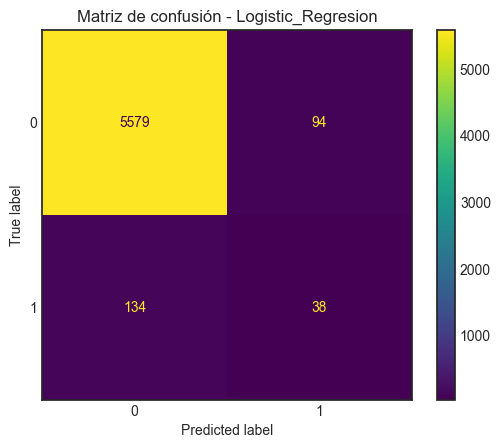


Generando classification report para Logistic_Regresion:

              precision    recall  f1-score   support

           0     0.9765    0.9834    0.9800      5673
           1     0.2879    0.2209    0.2500       172

    accuracy                         0.9610      5845
   macro avg     0.6322    0.6022    0.6150      5845
weighted avg     0.9563    0.9610    0.9585      5845

AUC-ROC (train): 0.9149
AUC-ROC (test) : 0.8280
PR-AUC  (train): 0.7845
PR-AUC  (test) : 0.2581
Accuracy (train): 0.9085
Accuracy (test) : 0.9629

Generando matriz de confusión para Logistic_Regresion:



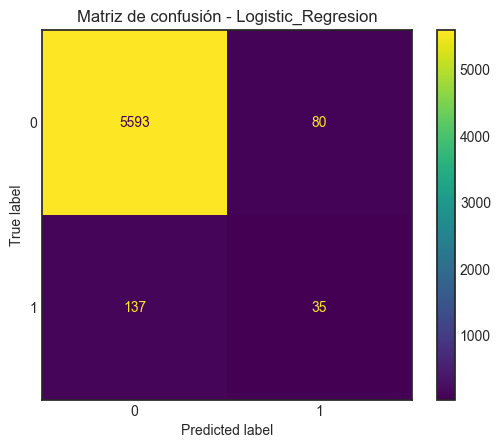


Generando classification report para Logistic_Regresion:

              precision    recall  f1-score   support

           0     0.9761    0.9859    0.9810      5673
           1     0.3043    0.2035    0.2439       172

    accuracy                         0.9629      5845
   macro avg     0.6402    0.5947    0.6124      5845
weighted avg     0.9563    0.9629    0.9593      5845

AUC-ROC (train): 0.9135
AUC-ROC (test) : 0.8268
PR-AUC  (train): 0.7784
PR-AUC  (test) : 0.2439
Accuracy (train): 0.9132
Accuracy (test) : 0.9598

Generando matriz de confusión para Logistic_Regresion:



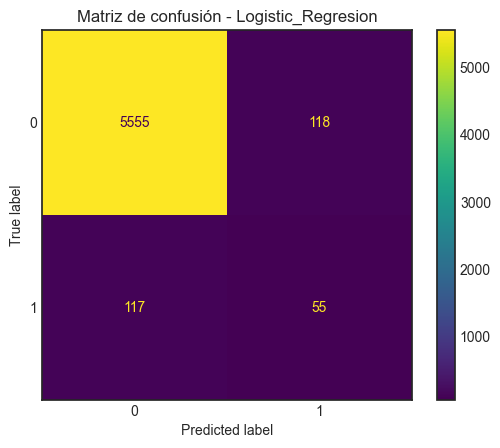


Generando classification report para Logistic_Regresion:

              precision    recall  f1-score   support

           0     0.9794    0.9792    0.9793      5673
           1     0.3179    0.3198    0.3188       172

    accuracy                         0.9598      5845
   macro avg     0.6486    0.6495    0.6491      5845
weighted avg     0.9599    0.9598    0.9599      5845

AUC-ROC (train): 0.9331
AUC-ROC (test) : 0.8338
PR-AUC  (train): 0.8148
PR-AUC  (test) : 0.2802
Accuracy (train): 0.9338
Accuracy (test) : 0.9677

Generando matriz de confusión para Logistic_Regresion:



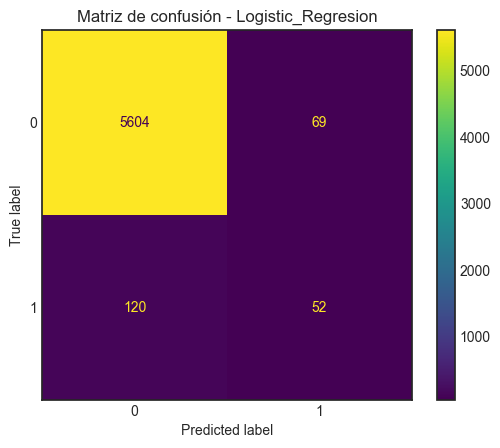


Generando classification report para Logistic_Regresion:

              precision    recall  f1-score   support

           0     0.9790    0.9878    0.9834      5673
           1     0.4298    0.3023    0.3549       172

    accuracy                         0.9677      5845
   macro avg     0.7044    0.6451    0.6692      5845
weighted avg     0.9629    0.9677    0.9649      5845

AUC-ROC (train): 0.9477
AUC-ROC (test) : 0.8323
PR-AUC  (train): 0.8690
PR-AUC  (test) : 0.3263


In [4]:
from src.model_utils.mod_evaluation import run_model_and_evaluate
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
plt.style.use('seaborn-v0_8-white')

model = LogisticRegression(
            random_state=42, max_iter=2000)


rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate(
    "Logistic_Regresion", model, X_train_sm, y_train_sm,
    X_test, y_test
)


rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate(
    "Logistic_Regresion", model, X_train_adasyn, y_train_adasyn,
    X_test, y_test
)

rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate(
    "Logistic_Regresion", model, X_train_bsm, y_train_bsm,
    X_test, y_test
)

rf_metrics, roc_auc_dict, fp_id, fn_id= run_model_and_evaluate(
    "Logistic_Regresion", model, X_train_svmsm, y_train_svmsm,
    X_test, y_test
)


Vamos a probar estos modelos y a evaluarlos pero utilizando Boruta para la selección de variables

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	17


BorutaPy finished running.

Iteration: 	7 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	17
Las variables seleccionadas con Boruta son: Index(['Anyomatricula', 'Prima', 'ValorVehículo', 'Canal', 'Socioec',
       'Antigüedad', 'Carnet'],
      dtype='object')
Las variables tentativas con Boruta son: Index([], dtype='object')
Accuracy (train): 0.8720
Accuracy (test) : 0.9559

Generando matriz de confusión para Logistic_Regresion:



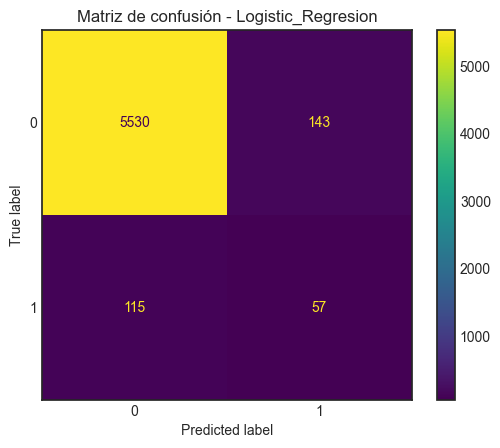


Generando classification report para Logistic_Regresion:

              precision    recall  f1-score   support

           0     0.9796    0.9748    0.9772      5673
           1     0.2850    0.3314    0.3065       172

    accuracy                         0.9559      5845
   macro avg     0.6323    0.6531    0.6418      5845
weighted avg     0.9592    0.9559    0.9575      5845

AUC-ROC (train): 0.8584
AUC-ROC (test) : 0.8237
PR-AUC  (train): 0.6082
PR-AUC  (test) : 0.2943
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	17


BorutaPy finished running.

Iteration: 	7 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	17
Las variables seleccionadas con Boruta son: Index(['An

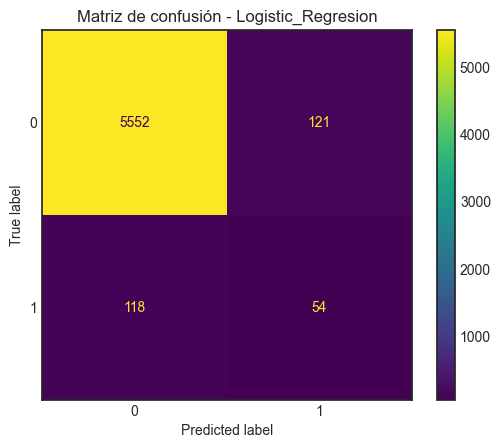


Generando classification report para Logistic_Regresion:

              precision    recall  f1-score   support

           0     0.9792    0.9787    0.9789      5673
           1     0.3086    0.3140    0.3112       172

    accuracy                         0.9591      5845
   macro avg     0.6439    0.6463    0.6451      5845
weighted avg     0.9595    0.9591    0.9593      5845

AUC-ROC (train): 0.8498
AUC-ROC (test) : 0.8233
PR-AUC  (train): 0.5730
PR-AUC  (test) : 0.2798
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	15
Iteration: 	7 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	15
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	15
Iteration: 	9 / 100
Co

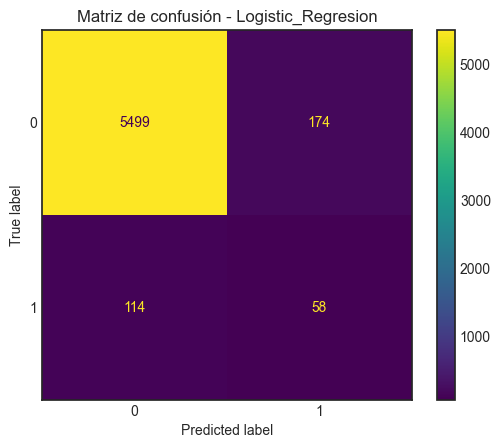


Generando classification report para Logistic_Regresion:

              precision    recall  f1-score   support

           0     0.9797    0.9693    0.9745      5673
           1     0.2500    0.3372    0.2871       172

    accuracy                         0.9507      5845
   macro avg     0.6148    0.6533    0.6308      5845
weighted avg     0.9582    0.9507    0.9543      5845

AUC-ROC (train): 0.8935
AUC-ROC (test) : 0.8266
PR-AUC  (train): 0.6782
PR-AUC  (test) : 0.2918
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	14
Iteration: 	7 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	14
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	14
Iteration: 	9 / 100
Co

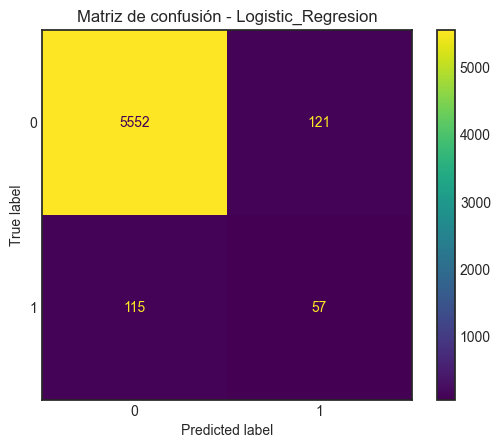


Generando classification report para Logistic_Regresion:

              precision    recall  f1-score   support

           0     0.9797    0.9787    0.9792      5673
           1     0.3202    0.3314    0.3257       172

    accuracy                         0.9596      5845
   macro avg     0.6500    0.6550    0.6525      5845
weighted avg     0.9603    0.9596    0.9600      5845

AUC-ROC (train): 0.9170
AUC-ROC (test) : 0.8075
PR-AUC  (train): 0.7950
PR-AUC  (test) : 0.3414


In [5]:
from src.model_utils.utils import boruta_selected_vars

X_train_sm_selected, X_train_sm_tentative = boruta_selected_vars(X_train_sm, y_train_sm)
rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate(
    "Logistic_Regresion", model, X_train_sm[X_train_sm_selected], y_train_sm,
    X_test[X_train_sm_selected], y_test
)

X_train_adasyn_selected, X_train_adasyn_tentative = boruta_selected_vars(X_train_adasyn, y_train_adasyn)
rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate(
    "Logistic_Regresion", model, X_train_adasyn[X_train_adasyn_selected], y_train_adasyn,
    X_test[X_train_adasyn_selected], y_test
)

X_train_bsm_selected, X_train_bsm_tentative = boruta_selected_vars(X_train_bsm, y_train_bsm)
rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate(
    "Logistic_Regresion", model, X_train_bsm[X_train_bsm_selected], y_train_bsm,
    X_test[X_train_bsm_selected], y_test
)

X_train_svmsm_selected, X_train_svmsm_tentative = boruta_selected_vars(X_train_svmsm, y_train_svmsm)
rf_metrics, roc_auc_dict, fp_id, fn_id= run_model_and_evaluate(
    "Logistic_Regresion", model, X_train_svmsm[X_train_svmsm_selected], y_train_svmsm,
    X_test[X_train_svmsm_selected], y_test
)


Observamos que el algoritmo de oversampling que mejor resultado ofrece, tanto con Boruta como sin él es BorderLine Smote.
Vamos a utilizar los datos de entrenamiento oversampleados para el restod e modelos de ensemble.

In [ ]:
from src.model_utils.utils import hyperparameter_tuning
from src.model_utils.mod_evaluation import run_model_and_evaluate
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


models = {
    "Random_Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "GBM_sklearn": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42)
}


param_dist_rf = {
    'n_estimators': [500, 600],
    'max_depth': [5,8,12],  # Limitar la profundidad para evitar el sobreajuste
    'min_samples_split': [5, 10, 20],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [4, 8, 10],  # Número mínimo de muestras en las hojas
    'max_features': ['sqrt', 'log2', 0.3]
}

# Parámetros a optimizar para GradientBoosting
param_dist_gbm = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [2, 3, 4],
    'min_samples_split': [20, 50, 80],
    'min_samples_leaf': [10, 20, 50],
    'subsample': [0.5, 0.7, 0.8],
    "max_features": ["sqrt", "log2"]
}

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
scale_pos_weight = n_neg / n_pos
scale_pos_weight

# Parámetros a optimizar para XGBoost
param_dist_xgb = {
    'n_estimators': [300, 400, 600],
    'learning_rate': [0.03, 0.05],
    'max_depth': [2, 3, 4],
    'subsample': [0.5, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.8],
    "gamma": [1, 2, 5, 10],
    "reg_lambda": [2, 5, 10, 20],
    "reg_alpha": [0.5, 1, 2],
    "min_child_weight": [10, 20, 30, 50],
    "scale_pos_weight": [scale_pos_weight]
}

param_dist_lgbm = {
    'objetive':["binary"],
    'n_estimators': [400, 500, 600],
    'num_leaves': [15, 25, 30, 45, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_split_gain' : [0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.6, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.8],
    'min_child_samples': [50, 80, 100],
    'reg_alpha': [0, 0.1, 0.5],  # Regularización L1
    'reg_lambda': [5, 10, 20]  # Regularización L2
}

param_dist_catboost = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],  # Regularización L2
    'bagging_temperature': [0, 0.5, 1]
}

# Crear un diccionario con los parámetros de búsqueda para cada modelo
param_dist = {
    "Random_Forest": param_dist_rf,
    "GBM_sklearn": param_dist_gbm,
    "XGBoost": param_dist_xgb,
    "LightGBM": param_dist_lgbm,
    "CatBoost": param_dist_catboost
}

models_not_smote = ["XGBoost", "LightGBM", "CatBoost"]
best_params_models = []

for name, model in models.items():
    if name not in models_not_smote:
        print(f"\nCalculamos selección de hiperparámetros para el modelo {name} con datos de entrenamiento con Oversampling")
        best_model, random_search, best_params =  hyperparameter_tuning(name, model, param_dist, X_train_bsm, y_train_bsm)
        best_params_models.append({name:best_params})
    else:
        print(f"\nCalculamos selección de hiperparámetros para el modelo {name} con datos de entrenamiento sin Oversampling")
        best_model, random_search, best_params =  hyperparameter_tuning(name, model, param_dist, X_train, y_train)
        best_params_models.append({name:best_params})

print("Mostramos resumen de mejores hiperparámetros")
best_params_models





Calculamos selección de hiperparámetros para el modelo Random_Forest con datos de entrenamiento con Oversampling


Mejores parámetros para Random_Forest: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.3, 'max_depth': 12}

Calculamos selección de hiperparámetros para el modelo GBM_sklearn con datos de entrenamiento con Oversampling


Mejores parámetros para GBM_sklearn: {'subsample': 0.5, 'n_estimators': 200, 'min_samples_split': 80, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.05}

Calculamos selección de hiperparámetros para el modelo XGBoost con datos de entrenamiento sin Oversampling


Mejores parámetros para XGBoost: {'subsample': 0.8, 'scale_pos_weight': np.float64(33.02620087336245), 'reg_lambda': 20, 'reg_alpha': 0.5, 'n_estimators': 600, 'min_child_weight': 30, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.6}

Calculamos selección de hiperparámetros para el modelo LightGBM 

Por último, ejecutamos los modelos con los mejores parámetros conseguidos.


Calculamos el modelo Random_Forest con oversampling Borderline Smote
Mejor umbral elegido ha sido: 0.40035888705187606
Accuracy (train): 0.9750
Accuracy (test) : 0.9502

Generando matriz de confusión para Random_Forest:



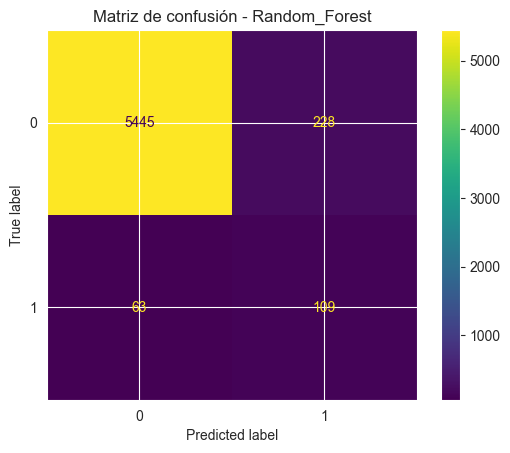


Generando classification report para Random_Forest:

              precision    recall  f1-score   support

           0     0.9886    0.9598    0.9740      5673
           1     0.3234    0.6337    0.4283       172

    accuracy                         0.9502      5845
   macro avg     0.6560    0.7968    0.7011      5845
weighted avg     0.9690    0.9502    0.9579      5845

AUC-ROC (train): 0.9628
AUC-ROC (test) : 0.8703
PR-AUC  (train): 0.6796
PR-AUC  (test) : 0.4733

Calculamos el modelo GBM_sklearn con oversampling Borderline Smote
Mejor umbral elegido ha sido: 0.5544363487104671
Accuracy (train): 0.9724
Accuracy (test) : 0.9579

Generando matriz de confusión para GBM_sklearn:



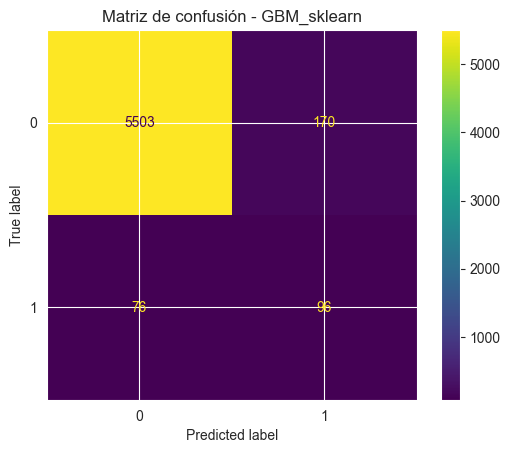


Generando classification report para GBM_sklearn:

              precision    recall  f1-score   support

           0     0.9864    0.9700    0.9781      5673
           1     0.3609    0.5581    0.4384       172

    accuracy                         0.9579      5845
   macro avg     0.6736    0.7641    0.7082      5845
weighted avg     0.9680    0.9579    0.9623      5845

AUC-ROC (train): 0.9086
AUC-ROC (test) : 0.8700
PR-AUC  (train): 0.5409
PR-AUC  (test) : 0.5027

Calculamos el modelo XGBoost sin oversampling
Mejor umbral elegido ha sido: 0.835208535194397
Accuracy (train): 0.9726
Accuracy (test) : 0.9660

Generando matriz de confusión para XGBoost:



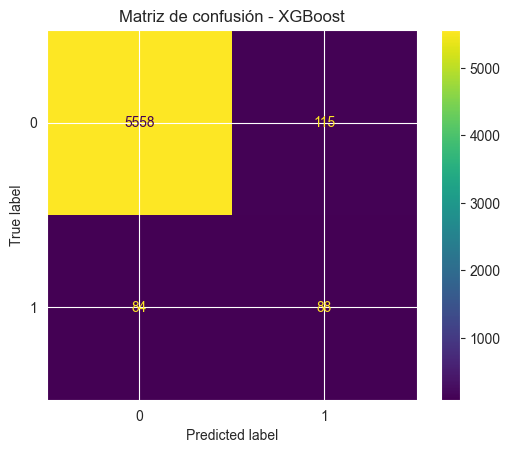


Generando classification report para XGBoost:

              precision    recall  f1-score   support

           0     0.9851    0.9797    0.9824      5673
           1     0.4335    0.5116    0.4693       172

    accuracy                         0.9660      5845
   macro avg     0.7093    0.7457    0.7259      5845
weighted avg     0.9689    0.9660    0.9673      5845

AUC-ROC (train): 0.9820
AUC-ROC (test) : 0.8805
PR-AUC  (train): 0.6901
PR-AUC  (test) : 0.4958

Calculamos el modelo LightGBM sin oversampling
[LightGBM] [Info] Number of positive: 550, number of negative: 18150
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 18700, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.029412 -> 

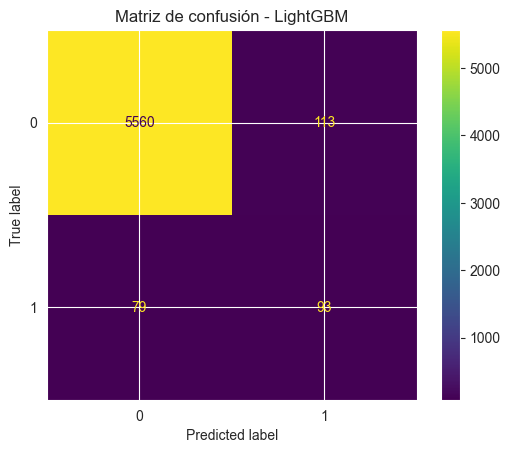


Generando classification report para LightGBM:

              precision    recall  f1-score   support

           0     0.9860    0.9801    0.9830      5673
           1     0.4515    0.5407    0.4921       172

    accuracy                         0.9672      5845
   macro avg     0.7187    0.7604    0.7375      5845
weighted avg     0.9703    0.9672    0.9686      5845

AUC-ROC (train): 0.9857
AUC-ROC (test) : 0.8881
PR-AUC  (train): 0.7214
PR-AUC  (test) : 0.5338

Calculamos el modelo CatBoost sin oversampling
0:	learn: 0.8888935	total: 152ms	remaining: 45.5s
1:	learn: 0.8971951	total: 159ms	remaining: 23.7s
2:	learn: 0.9009744	total: 166ms	remaining: 16.5s
3:	learn: 0.9007960	total: 173ms	remaining: 12.8s
4:	learn: 0.9009515	total: 181ms	remaining: 10.7s
5:	learn: 0.9025598	total: 188ms	remaining: 9.2s
6:	learn: 0.9031087	total: 194ms	remaining: 8.13s
7:	learn: 0.9027831	total: 201ms	remaining: 7.35s
8:	learn: 0.9030026	total: 209ms	remaining: 6.76s
9:	learn: 0.9006574	total: 218m

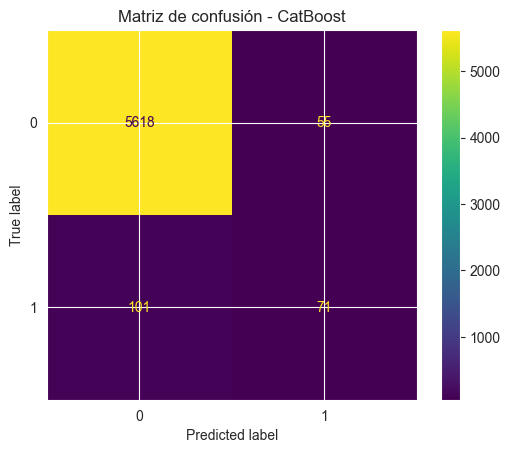


Generando classification report para CatBoost:

              precision    recall  f1-score   support

           0     0.9823    0.9903    0.9863      5673
           1     0.5635    0.4128    0.4765       172

    accuracy                         0.9733      5845
   macro avg     0.7729    0.7015    0.7314      5845
weighted avg     0.9700    0.9733    0.9713      5845

AUC-ROC (train): 0.9614
AUC-ROC (test) : 0.8825
PR-AUC  (train): 0.6151
PR-AUC  (test) : 0.5130


[{'Random_Forest': {'train_accuracy': 0.9750171115674195,
   'test_accuracy': 0.9502138579982892,
   'conf_matrix': array([[5445,  228],
          [  63,  109]]),
   'classification_report': '              precision    recall  f1-score   support\n\n           0     0.9886    0.9598    0.9740      5673\n           1     0.3234    0.6337    0.4283       172\n\n    accuracy                         0.9502      5845\n   macro avg     0.6560    0.7968    0.7011      5845\nweighted avg     0.9690    0.9502    0.9579      5845\n'}},
 {'Random_Forest': {'auc-roc-train': 0.9628182301499365,
   'auc-roc-test': 0.8703446353391626,
   'pr-auc-train': 0.6795794613913425,
   'pr-auc-test': 0.4733187320704203}},
 {'GBM_sklearn': {'train_accuracy': 0.9723648186173853,
   'test_accuracy': 0.9579127459366981,
   'conf_matrix': array([[5503,  170],
          [  76,   96]]),
   'classification_report': '              precision    recall  f1-score   support\n\n           0     0.9864    0.9700    0.9781    

In [5]:
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
scale_pos_weight = n_neg / n_pos
scale_pos_weight

models = {
        "Random_Forest": RandomForestClassifier(
            n_estimators=600, random_state=42,
            n_jobs=-1,
            max_depth=12,
            min_samples_leaf=4,
            min_samples_split=5,
            max_features='sqrt',
        ),
        "GBM_sklearn": GradientBoostingClassifier(
            random_state=42,
            subsample=0.5,
            n_estimators=200,
            min_samples_split=80,
            min_samples_leaf=10,
            max_features='sqrt',
            max_depth=4,
            learning_rate=0.05
        ),
        "XGBoost": XGBClassifier(
            random_state=42,
            n_estimators=500,
            learning_rate=0.05,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            gamma=2,
            reg_lambda=20,
            reg_alpha= 0.5,
            min_child_weight=30,
            tree_method="hist",
            scale_pos_weight=scale_pos_weight
        ),
        "LightGBM": LGBMClassifier(
            objective="binary",
            random_state=42,
            n_estimators=300,
            learning_rate=0.02,
            subsample_freq=1,
            max_depth=-1,
            subsample=0.8,
            colsample_bytree=0.8,
            min_child_samples=80,
            scale_pos_weight=scale_pos_weight,
            num_leaves=31,
        ),
        "CatBoost": CatBoostClassifier(
            random_state=42,
            iterations=300,
            learning_rate=0.03,
            depth=6,
            loss_function="Logloss",
            eval_metric="PRAUC",
            bootstrap_type="Bayesian",
            rsm=0.8,
            auto_class_weights="Balanced",
            bagging_temperature=0.5
        )
    }

metrics = []


models_not_smote = ["XGBoost", "LightGBM", "CatBoost"]

for name, model in models.items():

    if name not in models_not_smote:
        print(f"\nCalculamos el modelo {name} con oversampling Borderline Smote")
        rf_metrics, roc_auc_dict, fp_id, fn_id  = run_model_and_evaluate(
                name, model,
                X_train, y_train,
                X_test, y_test, "b_smote", 0.45
            )
        metrics.append({name: rf_metrics})
        metrics.append({name: roc_auc_dict})
    else:
        print(f"\nCalculamos el modelo {name} sin oversampling")
        rf_metrics, roc_auc_dict, fp_id, fn_id  = run_model_and_evaluate(
                name, model,
                X_train, y_train,
                X_test, y_test, None, 0.45
            )
        metrics.append({name: rf_metrics})
        metrics.append({name: roc_auc_dict})


metrics